In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels
from heatmapannot import heatmapannot


%load_ext autoreload
%autoreload 2

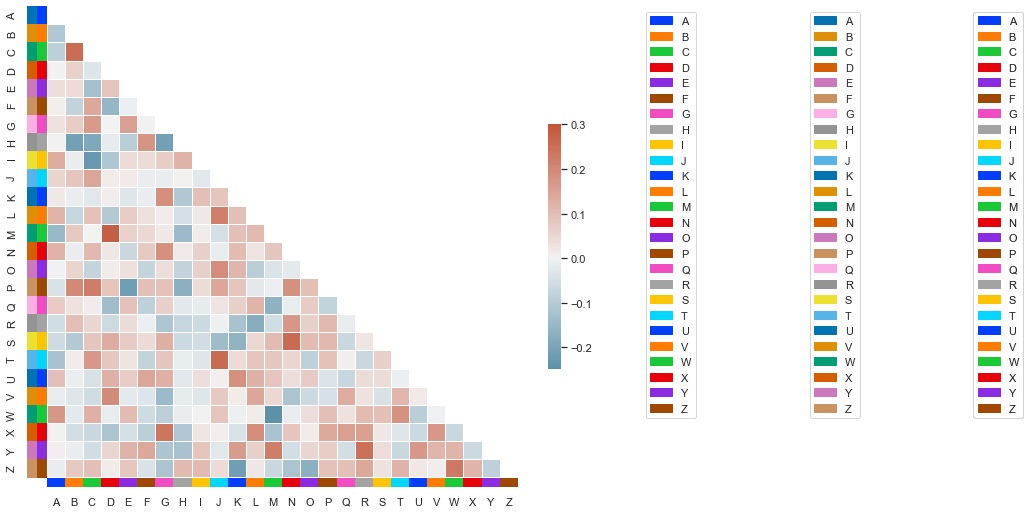

In [130]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
snsFig = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           ax = ax)

#snsFig.add_patch(Rectangle([-1, 2], 1, 1, color="green", clip_on=False))
#snsFig.set_xlim(-1, 26)
heatmapannot.AddHeatmapAnnot(row_palettes=["bright", "colorblind"], col_palettes=["bright"], ax=snsFig)
#heatmapannot.AddHeatmapAnnot(row_palettes=["bright"], ax=snsFig)

plt.show()

In [85]:
data_url = 'http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(data_url)
print(gapminder.head(3))

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710


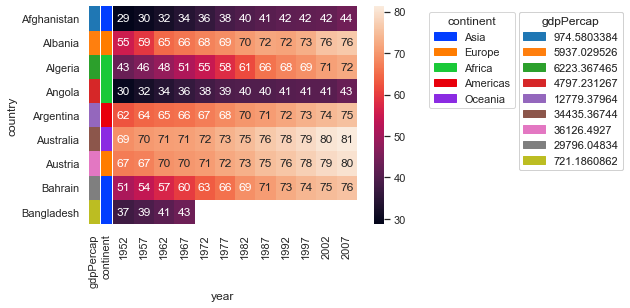

In [148]:
short_df = gapminder.head(100)
heatmap_data = pd.pivot_table(short_df, values='lifeExp', 
                     index=['country'], 
                     columns='year')
snsFig = sns.heatmap(heatmap_data, annot=True)
heatmapannot.AddHeatmapAnnot(data=short_df, heatmap_row="country", row_features = ["continent", "gdpPercap"],
                            row_palettes=["bright", "tab10"])

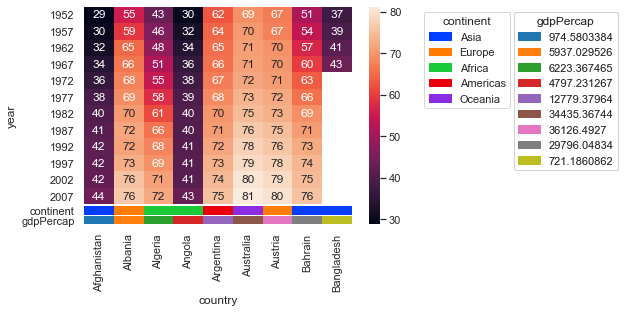

In [155]:
short_df = gapminder.head(100)
heatmap_data = pd.pivot_table(short_df, values='lifeExp', 
                     index=['year'], 
                     columns='country')
snsFig = sns.heatmap(heatmap_data, annot=True)
heatmapannot.AddHeatmapAnnot(data=short_df, heatmap_col="country", col_features = ["continent", "gdpPercap"],
                            col_palettes=["bright", "tab10"])

In [153]:
short_df

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
95,Bahrain,2007,708573.0,Asia,75.635,29796.048340
96,Bangladesh,1952,46886859.0,Asia,37.484,684.244172
97,Bangladesh,1957,51365468.0,Asia,39.348,661.637458
98,Bangladesh,1962,56839289.0,Asia,41.216,686.341554
